In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')


In [2]:
# Display first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Example: Removing rows with missing values
data = data.dropna()


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])


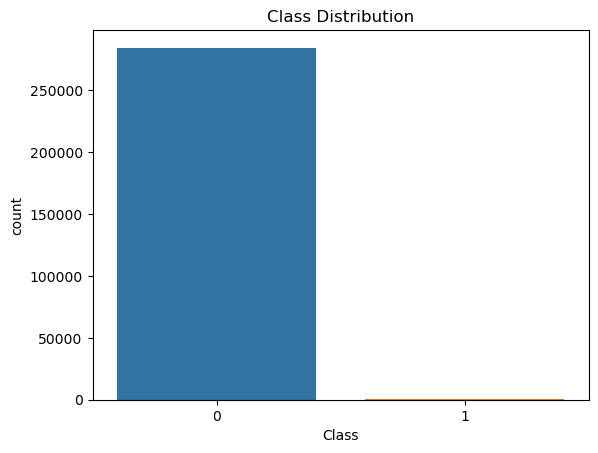

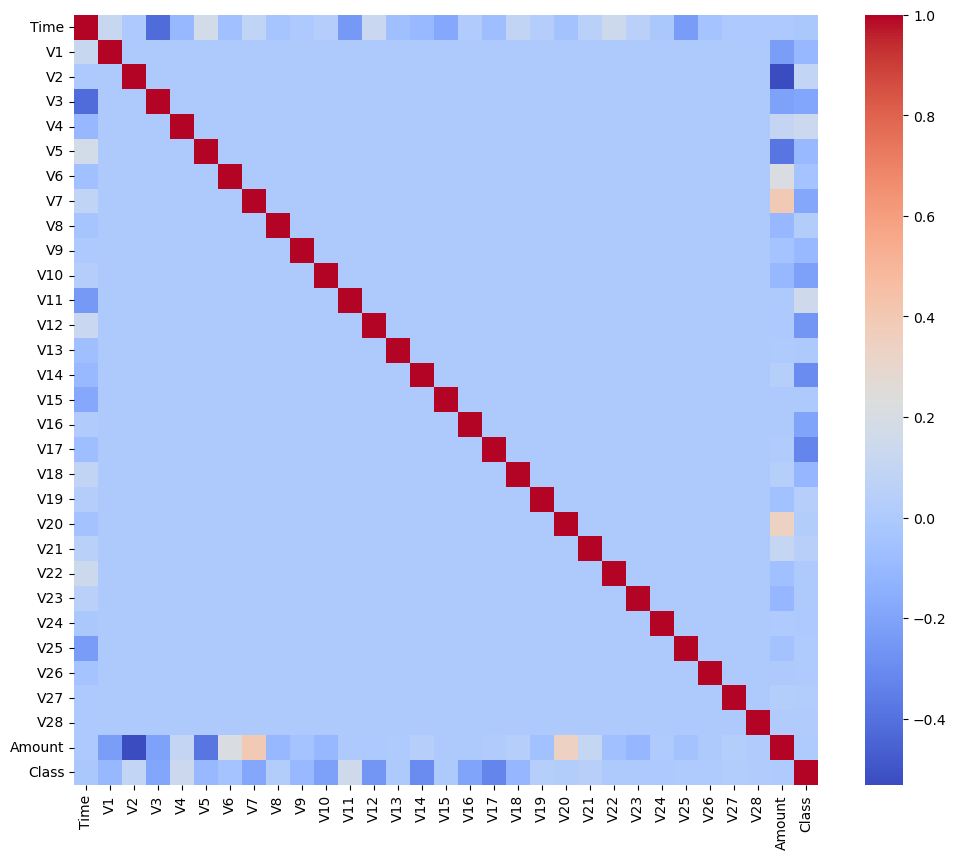

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()


In [6]:
# Assuming 'Time' is in seconds since the first transaction
data['Hour'] = data['Time'].apply(lambda x: (x // 3600) % 24)
data = data.drop('Time', axis=1)


In [7]:
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)
y = data['Class']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)


In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    
# Evaluate Logistic Regression
print("Logistic Regression:")
evaluate_model(lr, X_test, y_test)

# Evaluate Decision Tree
print("\nDecision Tree:")
evaluate_model(dt, X_test, y_test)

# Evaluate Random Forest
print("\nRandom Forest:")
evaluate_model(rf, X_test, y_test)


Logistic Regression:
Confusion Matrix:
[[55371  1492]
 [ 4527 52336]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

ROC-AUC Score: 0.9901734091224867

Decision Tree:
Confusion Matrix:
[[56709   154]
 [   61 56802]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC Score: 0.9981094912333152

Random Forest:
Confusion Matrix:
[[56848    15]
 [    0 56863]]

Classification Report:
      